In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('/content/taxi_trip_pricing.csv')


In [6]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [7]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [8]:
df.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price'],
      dtype='object')

In [9]:
df.shape

(1000, 11)

In [10]:
df['Trip_Distance_km'].fillna(df['Trip_Distance_km'].median(), inplace=True)

In [11]:
df['Trip_Distance_km'] = df['Trip_Distance_km'].apply(lambda x: 25.83 if x > 74 else x)

In [12]:
df['Time_of_Day'].count()

950

In [13]:
df['Time_of_Day'].unique()

array(['Morning', 'Afternoon', 'Evening', 'Night', nan], dtype=object)

In [14]:
df['Time_of_Day'].mode()

,Time_of_Day
0,Afternoon


In [16]:
df['Time_of_Day'].fillna('Afternoon', inplace=True)

In [17]:
df['Time_of_Day'].count()

1000

In [18]:
label = LabelEncoder()

In [19]:
df['Time_of_Day'] = label.fit_transform(df['Time_of_Day'])

In [20]:
df['Time_of_Day'].unique()

array([2, 0, 1, 3])

In [21]:
df['Day_of_Week'].count()

950

In [22]:
df['Day_of_Week'].unique()

array(['Weekday', 'Weekend', nan], dtype=object)

In [23]:
df['Day_of_Week'].mode()

,Day_of_Week
0,Weekday


In [24]:
df['Day_of_Week'].fillna('Weekday', inplace=True)

In [25]:
df['Day_of_Week'].count()

1000

In [26]:
df['Day_of_Week'] = label.fit_transform(df['Day_of_Week'])

In [27]:
df['Day_of_Week'].unique()

array([0, 1])

In [28]:
df['Passenger_Count'].mean()

2.4768421052631577

In [29]:
df['Passenger_Count'].median()

2.0

In [30]:
df['Passenger_Count'].mode()

,Passenger_Count
0,3.0


In [31]:
Q1 = df['Passenger_Count'].quantile(0.25)
Q3 = df['Passenger_Count'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.75

In [32]:
df['Passenger_Count'].fillna(df['Passenger_Count'].mean(), inplace=True)

In [33]:
df['Passenger_Count'].count()

1000

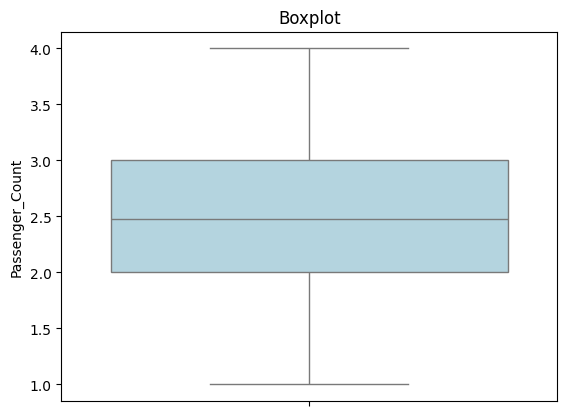

In [34]:
sns.boxplot(data=df['Passenger_Count'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [35]:
df['Traffic_Conditions'].count()

950

In [36]:
df['Traffic_Conditions'].unique()

array(['Low', 'High', 'Medium', nan], dtype=object)

In [37]:
df['Traffic_Conditions'].mode()

,Traffic_Conditions
0,Low


In [38]:
df['Traffic_Conditions'].fillna('Low', inplace=True)

In [39]:
df['Traffic_Conditions'].count()

1000

In [40]:
df['Traffic_Conditions'] = label.fit_transform(df['Traffic_Conditions'])

In [41]:
df['Traffic_Conditions'].unique()

array([1, 0, 2])

In [42]:
df['Weather'].count()

950

In [43]:
df['Weather'].unique()

array(['Clear', nan, 'Rain', 'Snow'], dtype=object)

In [44]:
df['Weather'].mode()

,Weather
0,Clear


In [45]:
df['Weather'].fillna('Clear', inplace=True)

In [46]:
df['Weather'].count()

1000

In [47]:
df['Weather'] = label.fit_transform(df['Weather'])

In [48]:
df['Weather'].unique()

array([0, 1, 2])

In [49]:
df['Base_Fare'].count()

950

In [50]:
df['Base_Fare'].mean()

3.502989473684211

In [51]:
df['Base_Fare'].median()

3.52

In [52]:
df['Base_Fare'].mode()

,Base_Fare
0,3.94


In [53]:
Q1 = df['Base_Fare'].quantile(0.25)
Q3 = df['Base_Fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

1.5299999999999998

In [54]:
df['Base_Fare'].fillna(df['Base_Fare'].mean(), inplace=True)
df['Base_Fare'].count()

1000

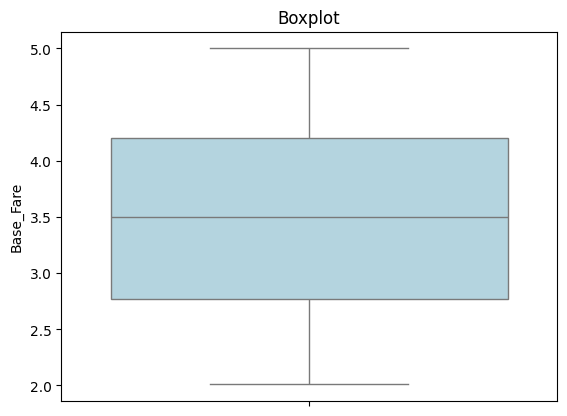

In [55]:
sns.boxplot(data=df['Base_Fare'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [56]:
df['Per_Km_Rate'].count()

950

In [57]:
df['Per_Km_Rate'].mean()

1.2333157894736844

In [58]:
df['Per_Km_Rate'].median()

1.22

In [59]:
df['Per_Km_Rate'].mode()

,Per_Km_Rate
0,0.63


In [60]:
Q1 = df['Per_Km_Rate'].quantile(0.25)
Q3 = df['Per_Km_Rate'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.7500000000000001

In [61]:
df['Per_Km_Rate'].fillna(df['Per_Km_Rate'].mean(), inplace=True)

In [62]:
df['Per_Km_Rate'].count()

1000

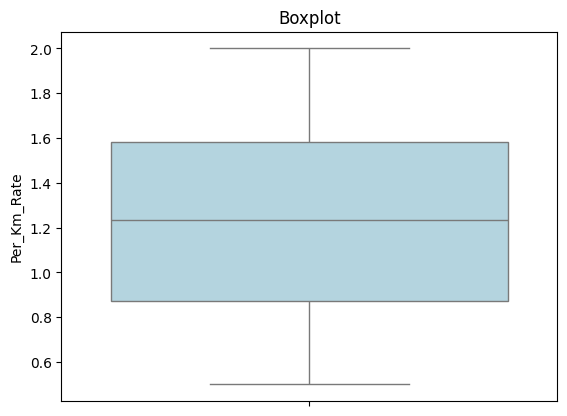

In [63]:
sns.boxplot(data=df['Per_Km_Rate'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [64]:
df['Per_Minute_Rate'].count()

950

In [65]:
df['Per_Minute_Rate'].mean()

0.2929157894736842

In [66]:
df['Per_Minute_Rate'].median()

0.29

In [67]:
df['Per_Minute_Rate'].mode()

,Per_Minute_Rate
0,0.15


In [68]:
Q1 = df['Per_Minute_Rate'].quantile(0.25)
Q3 = df['Per_Minute_Rate'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.2

In [69]:
df['Per_Minute_Rate'].fillna(df['Per_Minute_Rate'].mean(), inplace=True)
df['Per_Minute_Rate'].count()

1000

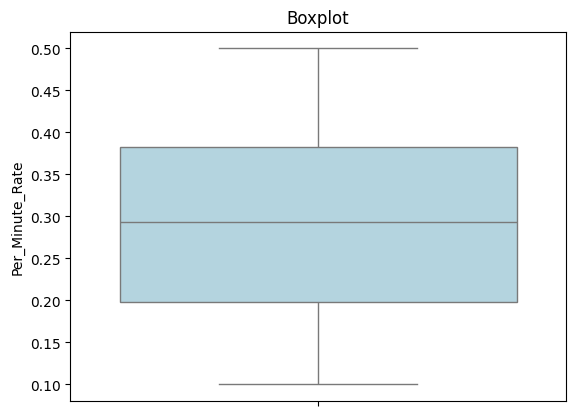

In [70]:
sns.boxplot(data=df['Per_Minute_Rate'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [71]:
df['Trip_Duration_Minutes'].count()


950

In [72]:
df['Trip_Duration_Minutes'].mean()

62.11811578947369

In [73]:
df['Trip_Duration_Minutes'].median()

61.86

In [74]:
df['Trip_Duration_Minutes'].mode()

,Trip_Duration_Minutes
0,89.21


In [75]:
Q1 = df['Trip_Duration_Minutes'].quantile(0.25)
Q3 = df['Trip_Duration_Minutes'].quantile(0.75)
IQR = Q3 - Q1
IQR

53.17250000000001

In [76]:
df['Trip_Duration_Minutes'].fillna(df['Trip_Duration_Minutes'].mean(), inplace=True)
df['Trip_Duration_Minutes'].count()

1000

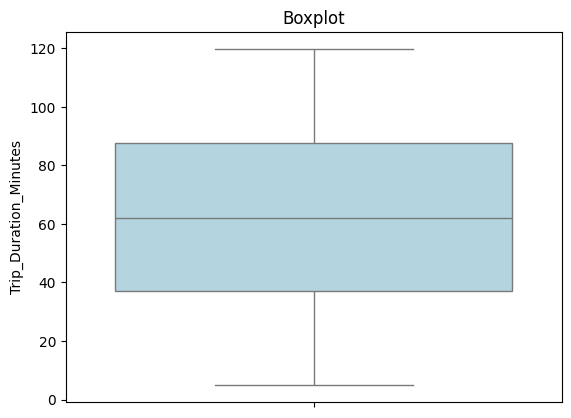

In [77]:
sns.boxplot(data=df['Trip_Duration_Minutes'], color='lightblue')
plt.title('Boxplot')
plt.show()

In [78]:
df['Trip_Price'].fillna(df['Trip_Price'].median(), inplace=True)
df['Trip_Price'] = df['Trip_Price'].apply(lambda x: 50 if x > 117 else x)
X = df.drop(columns=['Trip_Price'])
y = df[['Trip_Price']]

In [79]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
model = LinearRegression()


In [80]:
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)


In [82]:
mse

0.01196631594730902

In [83]:
np.sqrt(mse)

0.10939065749555132

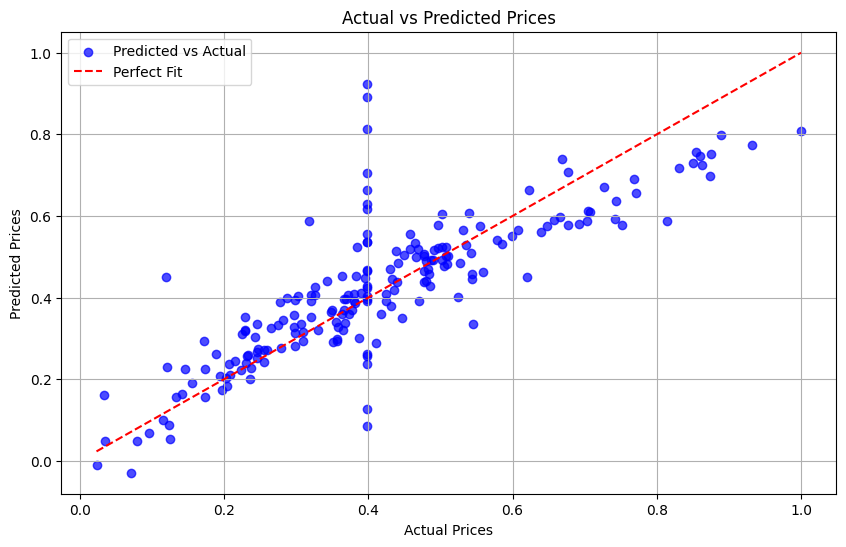

In [84]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Predicted vs Actual')

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Fit')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()